In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('C:/skillfactory work/homeworkGIT/diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Датасет №1


Набор данных основан на определенных диагностических измерениях, ограничен 1000 значений, где были выбраны женщины из индейского племени Пима. Изучим подробное описание каждого признака:

· Pregnancies – количество беременностей

· Glucose – концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе.

· BloodPressure – дистолическое давление крови

· SkinThickness – толщина кожи трицепса

· Insulin – содержания инсулина в крови (мю Ед/мл)

· BMI – индекс массы тела

· DiabetesPedigreeFunction –  вероятность развития диабета на основе семейного анамнеза.

· Age – возраст

· Outcome – наша целевая переменная, где 0 – нет диабета, 1 – есть

In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Минимальные показатели многих переменных равны 0
Отсюда делаем вывод, что раз показатели равны 0, то они исказят выходные данные, что снизит информативность нашей работы

попробуем преобразовать пустые показатели

In [6]:
# Анализируем датасет на наличие пропущенных данных 
def nan_function(x):
    return np.nan if x == 0 else x
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)
diabetes.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

параметр Insulin имеет слишком большой  процент пропусков, это избыточно влияет на нашу выборку

In [7]:
# Удаляем из данных признаки, где число пропусков составляет более 30%
n = diabetes.shape[0] #число строк в таблице
thresh = n*0.7
dia = diabetes.dropna(thresh=thresh, axis=1)

dia.shape

(768, 8)

In [8]:
# Удаляем из данных строки, в которых содержится более двух пропусков одновременно
m = dia.shape[1] #число признаков после удаления столбцов
dia = dia.dropna(thresh=m-2, axis=0)

dia.shape

(761, 8)

In [9]:
# В оставшихся записях заменяем пропуски на медиану
values = {
    'Glucose': dia['Glucose'].median(),
    'BloodPressure': dia['BloodPressure'].median(),
    'SkinThickness': dia['SkinThickness'].median(),
    'BMI': dia['BMI'].median(),
}
#заполняем оставшиеся записи константами в соответствии со словарем values
dia = dia.fillna(values)

In [10]:
dia.shape

(761, 8)

проведем быстрый визуальный анализ по параметру Glucose, для оценки полученного очищенного датасета

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


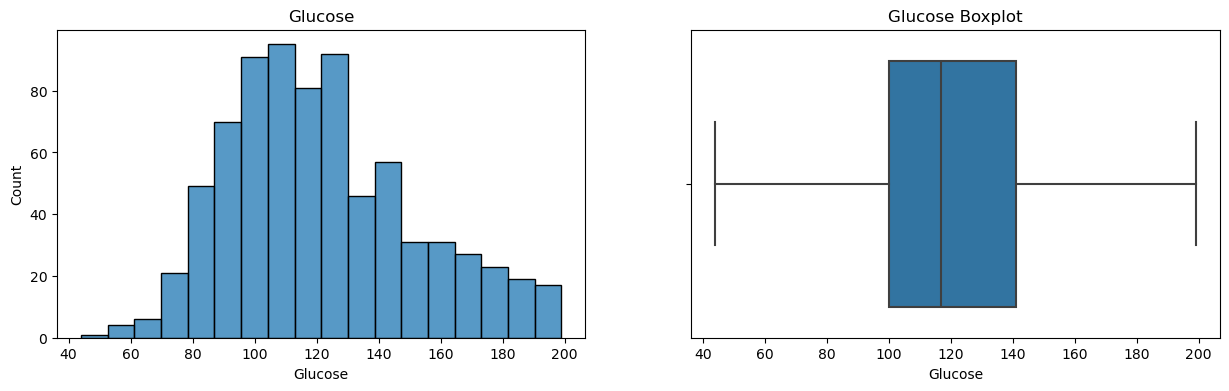

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=dia, x='Glucose', ax=axes[0]);
histplot.set_title('Glucose');
boxplot = sns.boxplot(data=dia, x='Glucose', ax=axes[1]);
boxplot.set_title('Glucose Boxplot');

In [12]:
dia.shape

(761, 8)

Имеет смысл разделить дата сет по основному показателю поставленного диагноза диабета =1 или его отсуствия =0, для дальнейшего анализа

In [13]:
dia1 = dia[dia.Outcome==1]
dia0 = dia[dia.Outcome==0]

In [14]:
dia1


Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0              6    148.0           72.0           35.0  33.6   
2              8    183.0           64.0           29.0  23.3   
4              0    137.0           40.0           35.0  43.1   
6              3     78.0           50.0           32.0  31.0   
8              2    197.0           70.0           45.0  30.5   
..           ...      ...            ...            ...   ...   
755            1    128.0           88.0           39.0  36.5   
757            0    123.0           72.0           29.0  36.3   
759            6    190.0           92.0           29.0  35.5   
761            9    170.0           74.0           31.0  44.0   
766            1    126.0           60.0           29.0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
2                       0.672   32        1  
4                       2.288   33        1  
6                       0.248   26        1  
8                       0.158   53        1  
..                        ...  ...      ...  
755                     1.057   37        1  
757                     0.258   52        1  
759                     0.278   66        1  
761                     0.403   43        1  
766                     0.349   47        1  

[267 rows x 8 columns]

In [15]:
dia1.shape

(267, 8)

267 имеют статус диабета

быстрый визуальный анализ на предмет наличия диабете или его отсуствия

Text(0.5, 1.0, 'График по показателю Outcome')

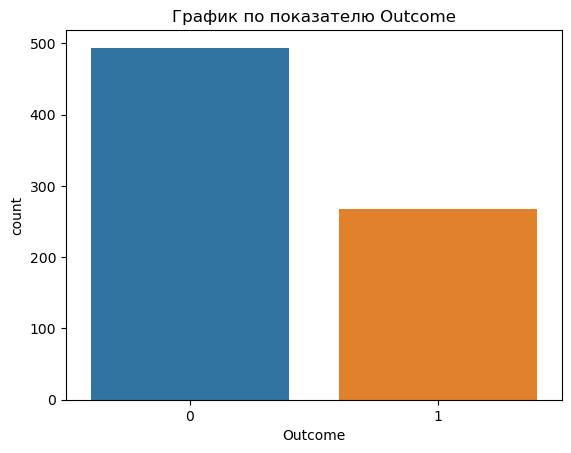

In [16]:
sns.countplot(x=dia.Outcome)
plt.title("График по показателю Outcome")

Вычисление % диабетиков и недиабетиков в выборке

In [17]:
Out0=len(dia[dia.Outcome==1])
Out1=len(dia[dia.Outcome==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0

(64.91458607095926, 35.08541392904073)

В данных 64,9% = 1 (диабет) и 35,1% = 0 (нет диабета)

In [18]:
labels = ['Здоровые','Диабет ✓'] # легенда
values = dia['Outcome'].value_counts() # данные для диаграммы
colors = ['seagreen','LightCoral'] # цветовая гамма

# строим график и отображаем его
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.show()

подтверждаем данные визуально. 35,1% имеют статус заболевания

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Выброс по показателям беременных с диагнозом диабет')

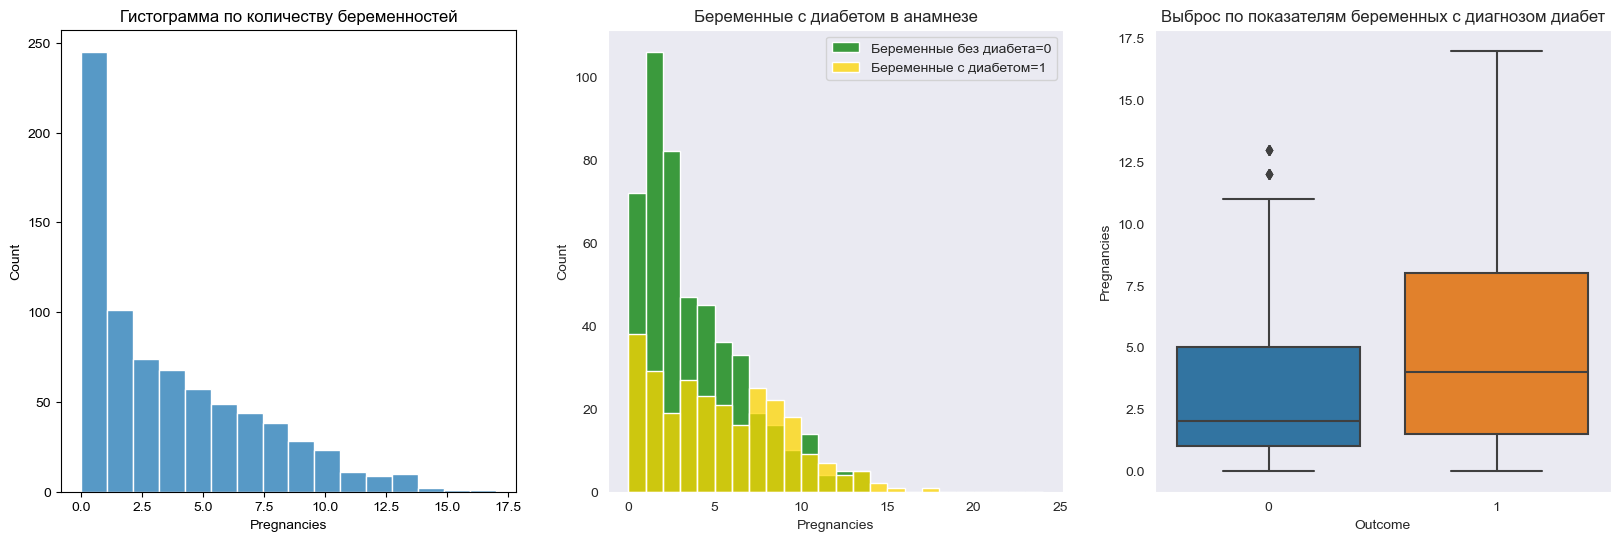

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Гистограмма по количеству беременностей")
sns.histplot(dia.Pregnancies,kde=False)
plt.subplot(1,3,2)
custom_bins = np.arange(0, 25, 1)
sns.histplot(dia0.Pregnancies,bins= custom_bins, kde=False,color="Green", label="Беременные без диабета=0")
sns.histplot(dia1.Pregnancies,bins= custom_bins,kde=False,color = "Gold", label = "Беременные с диабетом=1")
plt.title("Беременные с диабетом в анамнезе")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Pregnancies)
plt.title("Выброс по показателям беременных с диагнозом диабет")

Можно отметить, что риск диабета повышается, если женщина имеет беременность, это соотвествует статистике ВОЗ, и данным по гистационному диабету

In [20]:
# проводим фильтрацию данных
mask = dia['Outcome'] == 1

# строим график и отображаем его
fig = px.box(
    dia[mask], # датафрейм
    x="Age", # ось x
    points="all"
)
fig.update_layout(
    title_text='Распределение возраста больных', # заголовок
    xaxis_title_text='Возраст', # ось x
)
fig.show()

Медианный возраст больных диабетом = 36 лет

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Boxplot по диабету')

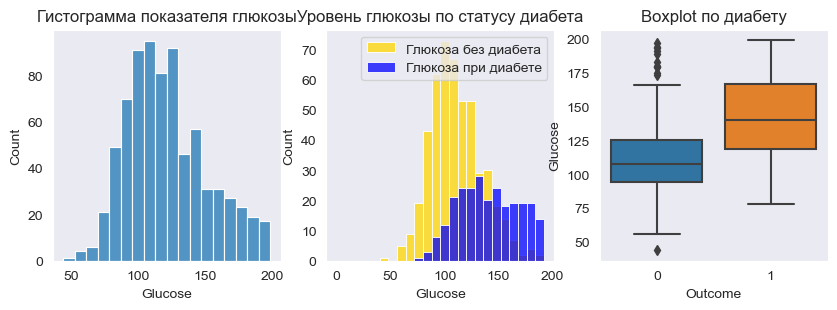

In [21]:
plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.title("Гистограмма показателя глюкозы")
sns.histplot(dia.Glucose, kde=False)
plt.subplot(1,3,2)
custom_bins = np.arange(0, 200, 8)
sns.histplot(dia0.Glucose,bins=custom_bins, kde=False,color="Gold", label="Глюкоза без диабета")
sns.histplot(dia1.Glucose,bins=custom_bins, kde=False, color="Blue", label = "Глюкоза при диабете")
plt.title("Уровень глюкозы по статусу диабета")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Glucose)
plt.title("Boxplot по диабету")

1–й график - гистограмма данных о глюкозе слегка смещена вправо. Понятно, что набор данных содержит более 60% больных сахарным диабетом, и, вероятно, уровень глюкозы у них был выше. Но общее среднее значение уровня глюкозы составляет 122.
2–й график - Очевидно, что в группе диабетиков уровень глюкозы выше, чем у людей без диабета.
3-й график - показывает , что высокие показатели характерны для диабета, а для недиабетиков - это скорее выбросы

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Boxplot давления по диабету')

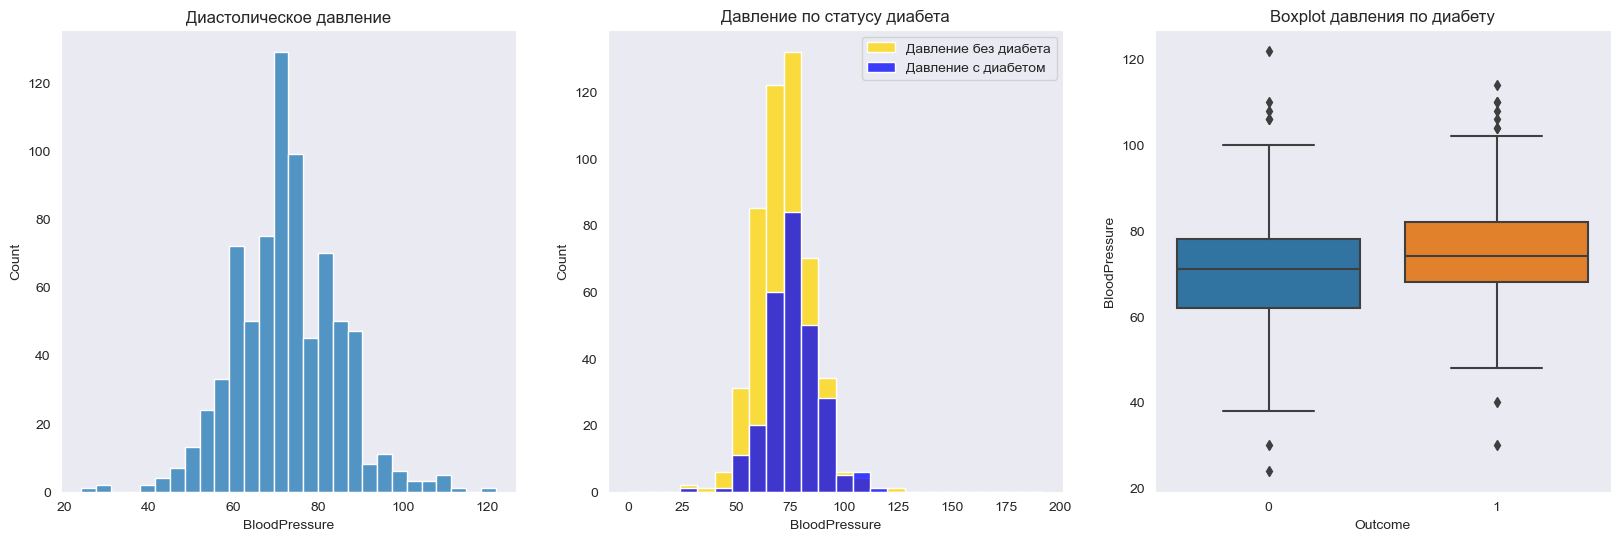

In [22]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(dia.BloodPressure, kde=False)
plt.title("Диастолическое давление")
plt.subplot(1,3,2)
custom_bins = np.arange(0, 200, 8)
sns.histplot(dia0.BloodPressure,bins = custom_bins, kde=False,color="Gold",label="Давление без диабета")
sns.histplot(dia1.BloodPressure,bins = custom_bins,kde=False, color="Blue", label="Давление с диабетом")
plt.legend()
plt.title("Давление по статусу диабета")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.BloodPressure)
plt.title("Boxplot давления по диабету")

1–й график - распределение выглядит нормально. Среднее значение равно 69, что находится в пределах нормальных значений для диастолического давления 80. 
2–й график - У большинства женщин, не страдающих диабетом, номинальное значение АД составляет 69, а у женщин с диабетом, по-видимому, высокое АД.
3-й график – несколько отклонений в данных. по графику можно чуть лучше оценить, что у больных женщин показатели диастолического давления выше

Посмотрим корреляцию диастолического давления и уровня глюкозы

In [23]:
# строим график и отображаем его
fig = px.scatter(
    dia, # датафрейм
    x="Glucose", # ось x
    y="BloodPressure", # ось y
    color="Outcome"
)
fig.update_layout(
    title_text='Взаимосвязь уровня глюкозы и показателем давления', # заголовок
    xaxis_title_text='Уровень глюкозы ', # ось x
    yaxis_title_text='Показатель давления', # ось y
)
fig.show()

Взаимосвязи нет, примерно одинаковые показатели

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Boxplot of SkinThickness by Outcome')

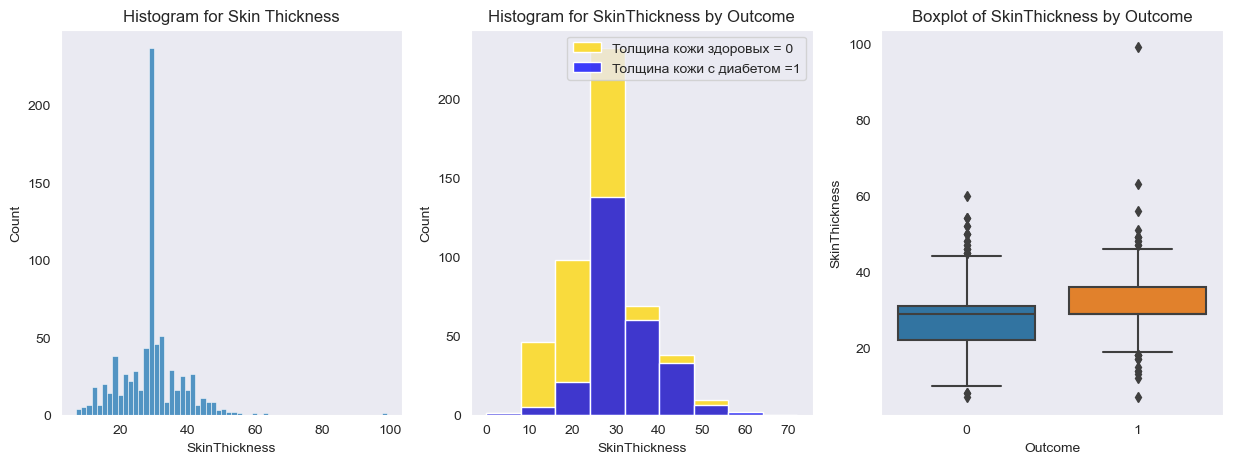

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.histplot(dia.SkinThickness, kde=False)
plt.title("Histogram for Skin Thickness")
plt.subplot(1,3,2)
custom_bins = np.arange(0, 80, 8)
sns.histplot(dia0.SkinThickness, bins = custom_bins, kde=False, color="Gold", label="Толщина кожи здоровых = 0")
sns.histplot(dia1.SkinThickness, bins = custom_bins,  kde=False, color="Blue", label="Толщина кожи с диабетом =1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")

1–й график - толщина кожи, похоже, немного искажена.
2-й график – Как и АД, у людей, не страдающих диабетом, толщина кожи ниже. искажены
3-й гарфик - очевидно, что люди с диабетом имеют бОльшую толщину кожи

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

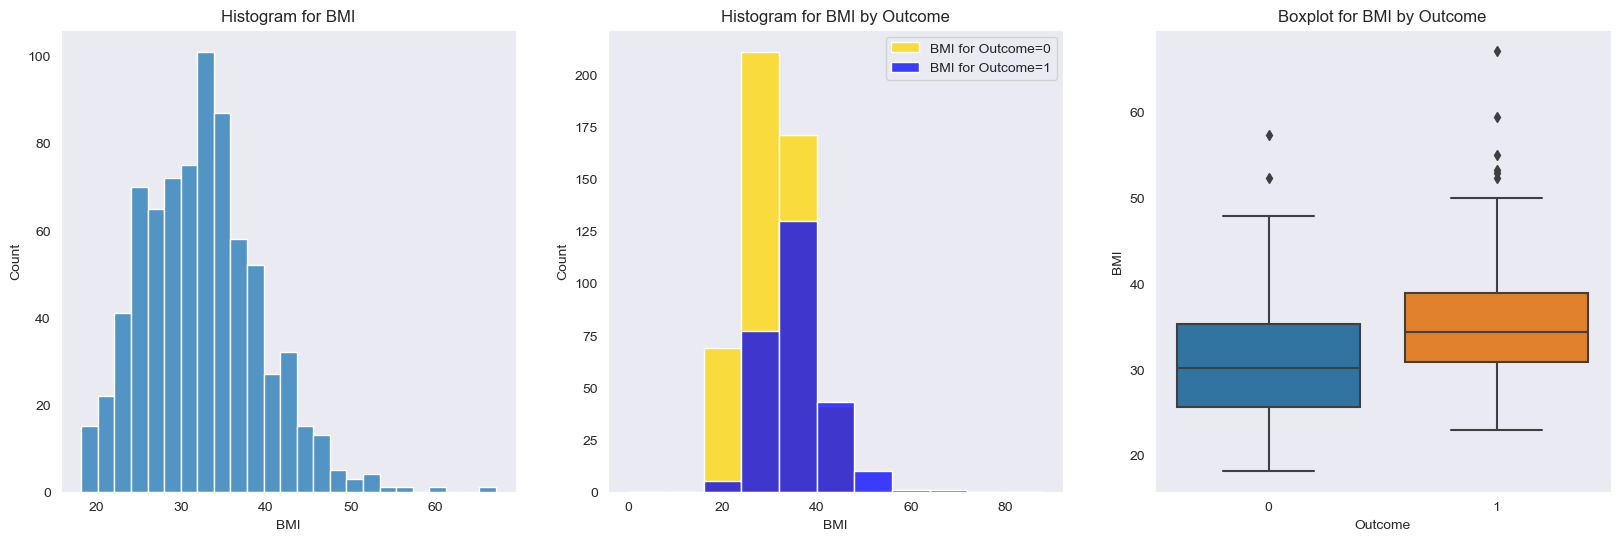

In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(dia.BMI, kde=False)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
custom_bins = np.arange(0, 90, 8)
sns.histplot(dia0.BMI, bins = custom_bins, kde=False,color="Gold", label="BMI for Outcome=0")
sns.histplot(dia1.BMI, bins = custom_bins, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.BMI)
plt.title("Boxplot for BMI by Outcome")

1–й график - Видно, что в целом люди страдают ожирением
2–й график - у людей с диабетом, похоже, более высокий ИМТ. 
3–й график - тот же вывод, что и 2-й график

In [26]:
# проводим фильтрацию данных 
bar_data = dia[dia['BMI'] > 30].groupby( 
    by ='Outcome',
    as_index=False
).count()

# строим график и отображаем его
fig = px.bar(
    data_frame=bar_data, # датафрейм
    x="Outcome", # ось x
    y="BMI", # ось y
    color='Outcome', # цветовая гамма
    orientation='v', # ориентация графика
    height=500, # высота
    width=1000, # ширина
    title='Распределение пациентов, страдающих ожирением',
    color_discrete_sequence=['#330C73','#EB89B5']# цветовая гамма
)
fig.update_layout(
    xaxis_title_text='Наличие диабета', # ось x
    yaxis_title_text='Количество пациентов', # ось y
)
fig.show()

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

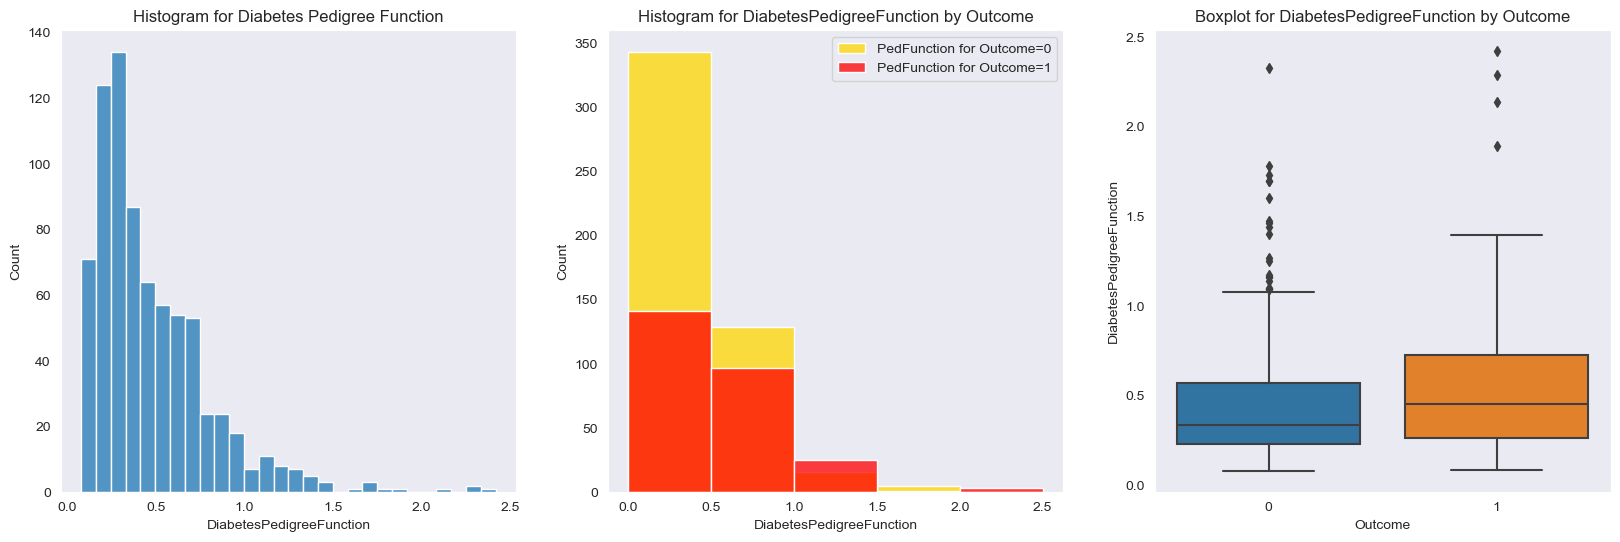

In [27]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(dia.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")
plt.subplot(1,3,2)

sns.histplot(dia0.DiabetesPedigreeFunction, bins = [0,0.5,1,1.5,2,2.5], kde=False, color="Gold", label="PedFunction for Outcome=0")
sns.histplot(dia1.DiabetesPedigreeFunction, bins = [0,0.5,1,1.5,2,2.5], kde=False, color="Red", label="PedFunction for Outcome=1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

Видна взаимосвязь наследственности и заболевания диабетом

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Выбросы')

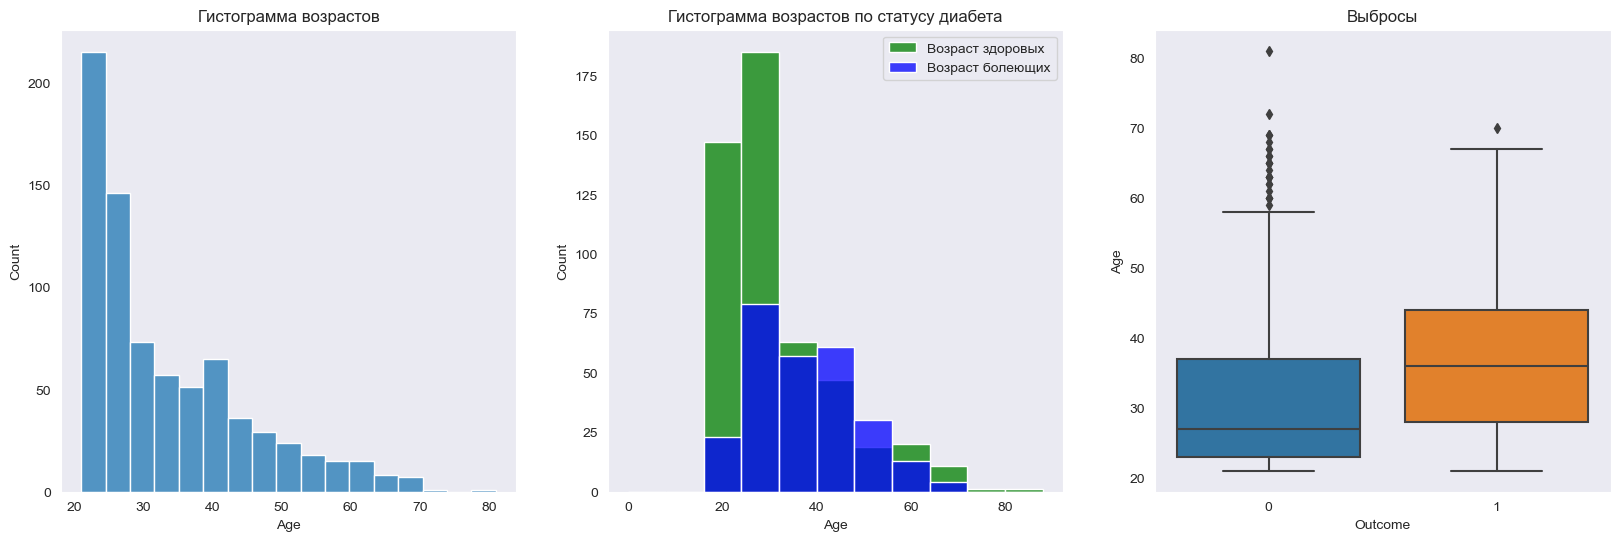

In [28]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(dia.Age,kde=False)
plt.title("Гистограмма возрастов")
plt.subplot(1,3,2)
custom_bins = np.arange(0, 90, 8)
sns.histplot(dia0.Age,kde=False,bins = custom_bins, color="Green", label="Возраст здоровых")
sns.histplot(dia1.Age,kde=False, bins = custom_bins, color="Blue", label="Возраст болеющих")
plt.legend()
plt.title("Гистограмма возрастов по статусу диабета")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Age)
plt.title("Выбросы")

Видна тенденция, согласно которой с возрастом у людей повышается вероятность развития диабета.

In [29]:
cor = dia.corr(method ='pearson')
cor

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.126957       0.209557       0.082138   
Glucose                      0.126957  1.000000       0.219707       0.193419   
BloodPressure                0.209557  0.219707       1.000000       0.191890   
SkinThickness                0.082138  0.193419       0.191890       1.000000   
BMI                          0.021679  0.231950       0.281252       0.543204   
DiabetesPedigreeFunction    -0.033328  0.131952      -0.002603       0.102383   
Age                          0.547661  0.261836       0.325652       0.126393   
Outcome                      0.219453  0.491450       0.166148       0.215540   

                               BMI  DiabetesPedigreeFunction       Age  \
Pregnancies               0.021679                 -0.033328  0.547661   
Glucose                   0.231950                  0.131952  0.261836   
BloodPressure             0.281252                 -0.002603  0.325652   
SkinThickness             0.543204                  0.102383  0.126393   
BMI                       1.000000                  0.153702  0.025514   
DiabetesPedigreeFunction  0.153702                  1.000000  0.028450   
Age                       0.025514                  0.028450  1.000000   
Outcome                   0.312989                  0.171662  0.235470   

                           Outcome  
Pregnancies               0.219453  
Glucose                   0.491450  
BloodPressure             0.166148  
SkinThickness             0.215540  
BMI                       0.312989  
DiabetesPedigreeFunction  0.171662  
Age                       0.235470  
Outcome                   1.000000

Нет 2 факторов, имеющих сильную линейную взаимосвязь
Возраст и беременность, а также ИМТ и худоба кожи имеют умеренно положительную линейную зависимость
Технически корреляция глюкозы и инсулина низкая, но 0,58 близко к 0,6, поэтому ее можно считать умеренной

In [30]:
# Функция для перевода числового признака Age в категориальный
def get_age_cat(age):
        if age >= 21 and age < 30:
            return "20+"
        elif age >= 30 and age < 40:
            return "30+"
        elif age >= 40 and age < 50:
            return "40+"
        elif age >= 50 and age < 60:
            return "50+"
        elif age >= 60 and age < 70:
            return "60+"
        elif age >= 70 and age < 80:
            return "70+"
        elif age >= 80 and age < 90:
            return "80+"    
        elif age > 90:
            return "90+"
        
# Переводим числовой признак в категориальный        
dia['AgeCat']=dia['Age'].apply(get_age_cat)   

# Создаем сводную таблицу
pivot = dia.pivot_table(
    values='Outcome',
    columns='BMI',
    index='AgeCat'
)

# Функция, которая переводит формат Pandas DataFrame в поддерживаемый Plotly формат
def pivot_to_plotly(df):
    return {
        'z': df.values.tolist(),
        'x': df.columns.tolist(),
        'y': df.index.tolist()     
    }

# строим график и отображаем его  
fig = go.Figure(
    data=go.Heatmap(pivot_to_plotly(pivot))
)
fig.update_layout(
    title_text='Взаимосвязь возраста и ИМТ с диабетом', # заголовок
    xaxis_title_text='BMI', # ось x
    yaxis_title_text='Возрастная категория', # ось y
)
fig.show() 

_С увеличением возраста и ИМТ чаще встречается диабет_

___
**Добавляем второй датасет**
___


Cardiovascular Study Dataset - Данные о наиболее важных факторах риска сердечно-сосудистых заболеваний.

1. Sex: мужской или женский ("M" или "F")
2. Age: Возраст пациента
3. is_smoking: является ли пациент курильщиком ("YES" или "NO")
4. Cigs Per Day: количество сигарет, которое человек выкуривает в среднем за один день
5. BP Meds: принимал ли пациент лекарства от артериального давления
6. Prevalent Stroke: перенес ли пациент ранее инсульт
7. Prevalent Hyp: была ли у пациента гипертензия
8. Diabetes: был ли у пациента диабет
9. Tot Chol: уровень общего холестерина 
10. Sys BP: систолическое артериальное давление
11. Dia BP: диастолическое артериальное давление 
12. BMI: индекс массы тела
13. Heart Rate: частота сердечных сокращений
14. Glucose: уровень глюкозы
15. 10 year risk of coronary heart disease CHD: 10-летний риск развития ишемической болезни сердца

In [31]:
cardio = pd.read_csv('C:/skillfactory work/homeworkGIT/train.csv')
display(cardio.head())

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

посмотрим размерность датасета

In [32]:
cardio.shape

(3390, 17)

In [33]:
# Подготовка к объединению
dia['sex'] = 'F' # добавим столбец с полом, в прошлом датасете были все женщины, ставим 'F'
dia.rename(columns={'Glucose':'glucose', 'BloodPressure':'diaBP', 'Age':'age', 'Outcome':'diabetes'}, inplace=True)
dia

Pregnancies  glucose  diaBP  SkinThickness   BMI  \
0              6    148.0   72.0           35.0  33.6   
1              1     85.0   66.0           29.0  26.6   
2              8    183.0   64.0           29.0  23.3   
3              1     89.0   66.0           23.0  28.1   
4              0    137.0   40.0           35.0  43.1   
..           ...      ...    ...            ...   ...   
763           10    101.0   76.0           48.0  32.9   
764            2    122.0   70.0           27.0  36.8   
765            5    121.0   72.0           23.0  26.2   
766            1    126.0   60.0           29.0  30.1   
767            1     93.0   70.0           31.0  30.4   

     DiabetesPedigreeFunction  age  diabetes AgeCat sex  
0                       0.627   50         1    50+   F  
1                       0.351   31         0    30+   F  
2                       0.672   32         1    30+   F  
3                       0.167   21         0    20+   F  
4                       2.288   33         1    30+   F  
..                        ...  ...       ...    ...  ..  
763                     0.171   63         0    60+   F  
764                     0.340   27         0    20+   F  
765                     0.245   30         0    30+   F  
766                     0.349   47         1    40+   F  
767                     0.315   23         0    20+   F  

[761 rows x 10 columns]

In [34]:
# Соединяем датасеты
diabetes_cardio = pd.concat([cardio,dia], ignore_index=True) 
diabetes_cardio

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0     0.0   64        2.0   F        YES         3.0     0.0              0.0   
1     1.0   36        4.0   M         NO         0.0     0.0              0.0   
2     2.0   46        1.0   F        YES        10.0     0.0              0.0   
3     3.0   50        1.0   M        YES        20.0     0.0              0.0   
4     4.0   64        1.0   F        YES        30.0     0.0              0.0   
...   ...  ...        ...  ..        ...         ...     ...              ...   
4146  NaN   63        NaN   F        NaN         NaN     NaN              NaN   
4147  NaN   27        NaN   F        NaN         NaN     NaN              NaN   
4148  NaN   30        NaN   F        NaN         NaN     NaN              NaN   
4149  NaN   47        NaN   F        NaN         NaN     NaN              NaN   
4150  NaN   23        NaN   F        NaN         NaN     NaN              NaN   

      prevalentHyp  diabetes  ...  sysBP  diaBP    BMI  heartRate  glucose  \
0              0.0         0  ...  148.0   85.0    NaN       90.0     80.0   
1              1.0         0  ...  168.0   98.0  29.77       72.0     75.0   
2              0.0         0  ...  116.0   71.0  20.35       88.0     94.0   
3              1.0         0  ...  158.0   88.0  28.26       68.0     94.0   
4              0.0         0  ...  136.5   85.0  26.42       70.0     77.0   
...            ...       ...  ...    ...    ...    ...        ...      ...   
4146           NaN         0  ...    NaN   76.0  32.90        NaN    101.0   
4147           NaN         0  ...    NaN   70.0  36.80        NaN    122.0   
4148           NaN         0  ...    NaN   72.0  26.20        NaN    121.0   
4149           NaN         1  ...    NaN   60.0  30.10        NaN    126.0   
4150           NaN         0  ...    NaN   70.0  30.40        NaN     93.0   

      TenYearCHD  Pregnancies  SkinThickness  DiabetesPedigreeFunction  AgeCat  
0            1.0          NaN            NaN                       NaN     NaN  
1            0.0          NaN            NaN                       NaN     NaN  
2            0.0          NaN            NaN                       NaN     NaN  
3            1.0          NaN            NaN                       NaN     NaN  
4            0.0          NaN            NaN                       NaN     NaN  
...          ...          ...            ...                       ...     ...  
4146         NaN         10.0           48.0                     0.171     60+  
4147         NaN          2.0           27.0                     0.340     20+  
4148         NaN          5.0           23.0                     0.245     30+  
4149         NaN          1.0           29.0                     0.349     40+  
4150         NaN          1.0           31.0                     0.315     20+  

[4151 rows x 21 columns]

размер нового датасета

In [35]:
diabetes_cardio.shape

(4151, 21)

In [36]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_cardio.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_cardio[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_cardio[col].nunique() / diabetes_cardio[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
BPMeds: 97.01% одинаковых значений
prevalentStroke: 99.35% одинаковых значений


In [37]:
diabetes_cardio = diabetes_cardio.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes_cardio.shape[1]}')

Результирующее число признаков: 18


In [38]:
# Анализируем датасет на наличие пропущенных данных 
diabetes_cardio.isnull().mean().round(2).sort_values(ascending=False)

AgeCat                      0.82
DiabetesPedigreeFunction    0.82
SkinThickness               0.82
Pregnancies                 0.82
education                   0.20
cigsPerDay                  0.19
totChol                     0.19
TenYearCHD                  0.18
is_smoking                  0.18
prevalentHyp                0.18
sysBP                       0.18
heartRate                   0.18
glucose                     0.07
age                         0.00
BMI                         0.00
diabetes                    0.00
sex                         0.00
diaBP                       0.00
dtype: float64

In [39]:
# Удаляем из данных признаки, где число пропусков составляет более 30%
n = diabetes_cardio.shape[0] #число строк в таблице
thresh = n*0.7
diabetes_cardio_cleaned = diabetes_cardio.dropna(thresh=thresh, axis=1)

diabetes_cardio_cleaned.shape

(4151, 14)

In [40]:
# В оставшихся записях заменяем пропуски на медиану
values = {
    'cigsPerDay': diabetes_cardio_cleaned['cigsPerDay'].median(),
    'totChol': diabetes_cardio_cleaned['totChol'].median(),
    'sysBP': diabetes_cardio_cleaned['sysBP'].median(),
    'heartRate': diabetes_cardio_cleaned['heartRate'].median(),
    'glucose': diabetes_cardio_cleaned['glucose'].median(),
    'diaBP': diabetes_cardio_cleaned['diaBP'].median(),
    'BMI': diabetes_cardio_cleaned['BMI'].median(),
}
#заполняем оставшиеся записи константами в соответствии со словарем values
diabetes_cardio_cleaned = diabetes_cardio_cleaned.fillna(values)

In [41]:
labels = ['Женщины','Мужчины'] # легенда
values = diabetes_cardio_cleaned['sex'].value_counts() # данные для диаграммы
colors = ['pink','blue'] # цветовая гамма

# строим график и отображаем его
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.show()


In [42]:
labels = ['Здоровые','Есть диабет'] # легенда
values = diabetes_cardio_cleaned['diabetes'].value_counts() # данные для диаграммы
colors = ['green','red'] # цветовая гамма

# строим график и отображаем его
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.show()

In [43]:
# проводим фильтрацию данных
mask = diabetes_cardio_cleaned['diabetes'] == 1

# строим график и отображаем его
fig = px.box(
    diabetes_cardio_cleaned[mask], # датафрейм
    x="age", # ось x
    points="all"
)
fig.update_layout(
    title_text='Распределение возраста больных', # заголовок
    xaxis_title_text='Возраст', # ось x
)
fig.show()

Обзор по показателям больных и здоровых

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

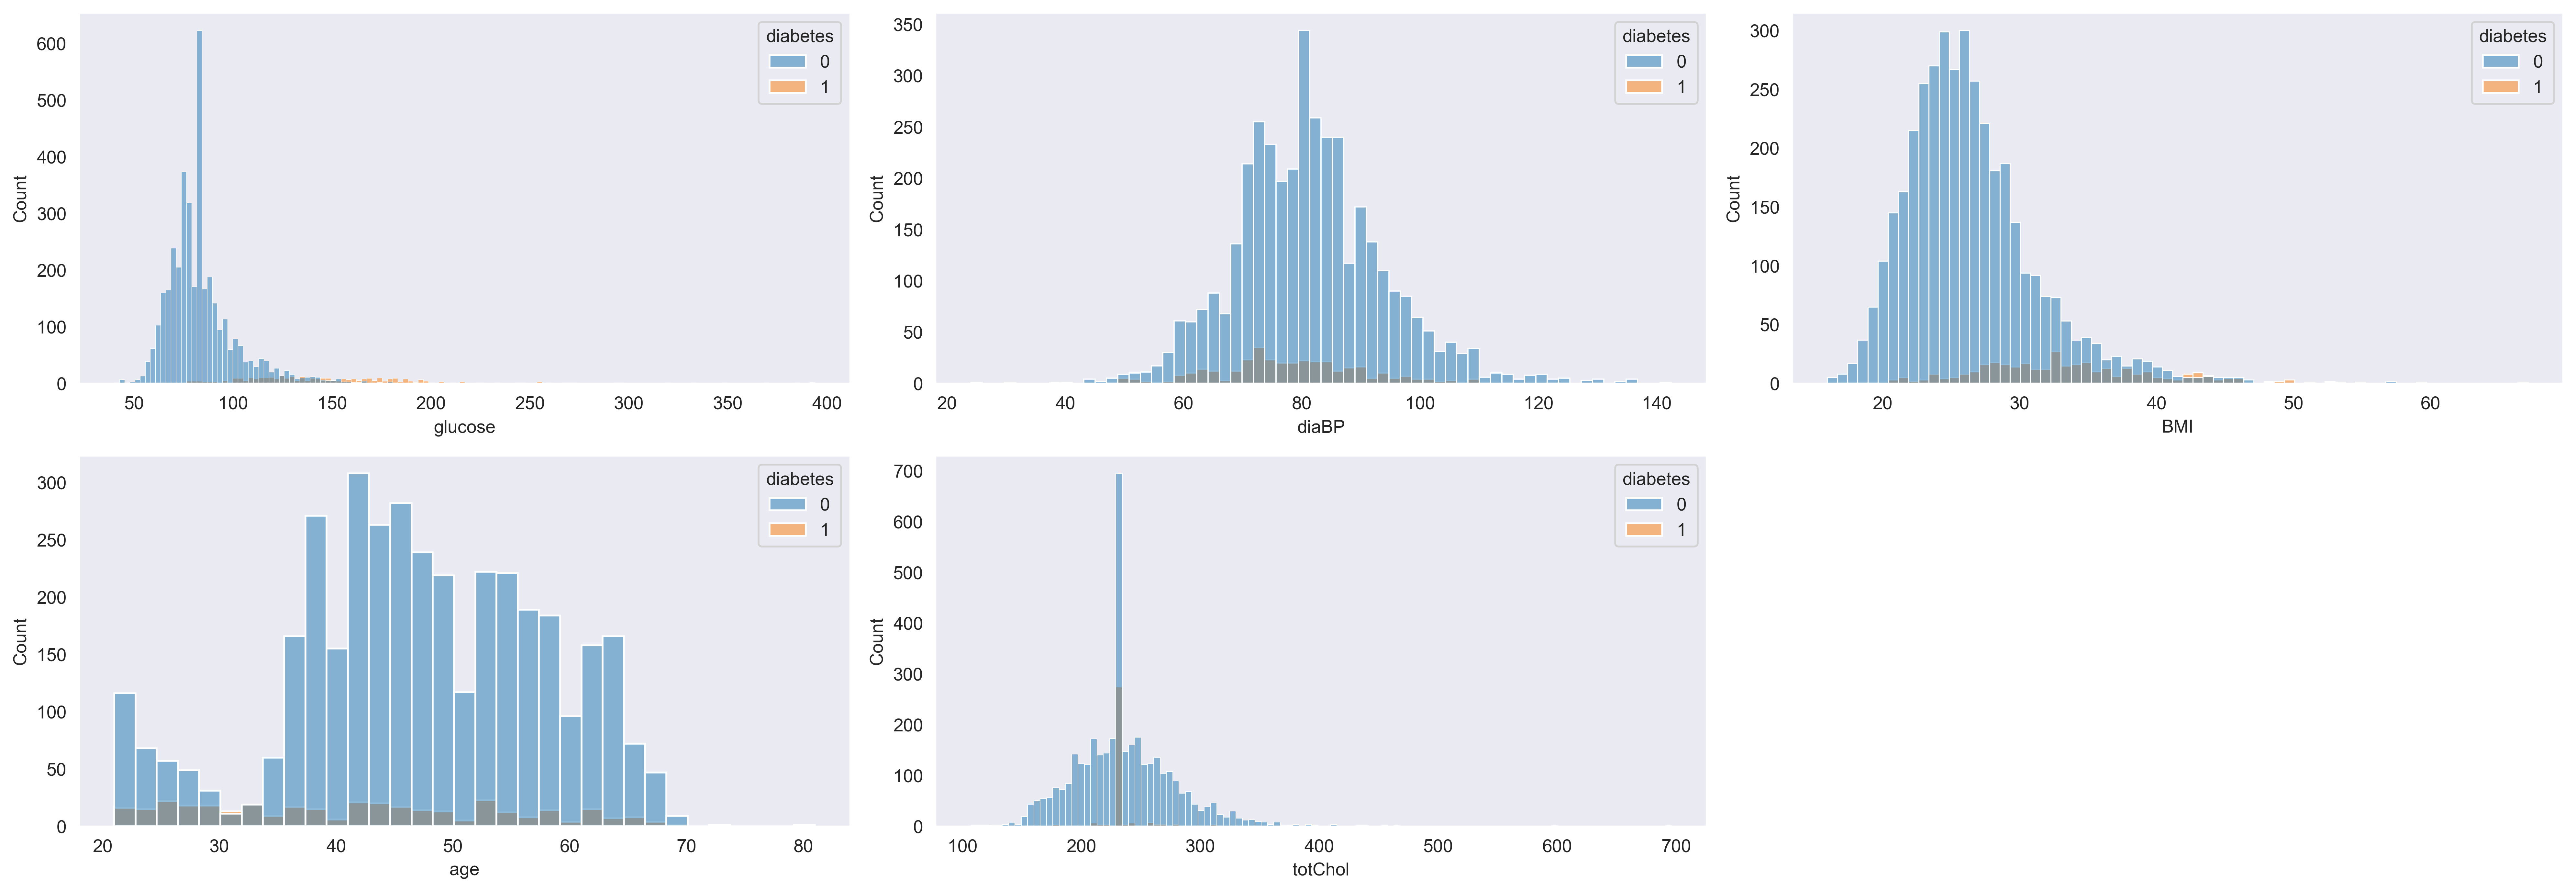

In [44]:
cols=[
    'glucose',
    'diaBP',
    'BMI',
    'age',
    'totChol'
]

plt.figure(figsize=(20, 10), dpi=400)

for i, column in enumerate(cols, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=diabetes_cardio_cleaned, x=column, hue='diabetes')
           
    plt.tight_layout()

In [45]:
# Группируем данные согласно условию
bar_data = diabetes_cardio_cleaned[diabetes_cardio_cleaned['diabetes']==1].groupby( 
    by ='education',
    as_index=False
).count()

# строим график и отображаем его
fig = px.bar(
    data_frame=bar_data, # датафрейм
    x="education", # ось x
    y="diabetes", # ось y
    color='education', # расцветка в зависимости от числа продуктов
    orientation='v', # ориентация графика
    height=500, # высота
    width=1000, # ширина
    title='Зависимость заболеваемости диабетом от уровня образования', #заголовок
    barmode='group'
)
fig.update_layout(
    xaxis_title_text='Уровень образования', # ось x
    yaxis_title_text='Количество наблюдений', # ось y
)
fig.show()

Уроваень образования влияет на статус диабета

In [46]:
# Группируем данные 
bar_data = diabetes_cardio_cleaned[diabetes_cardio_cleaned['diabetes']==1].groupby( 
    by='prevalentHyp',
    as_index=False
).count()

# строим график и отображаем его
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="prevalentHyp", #ось x
    y="diabetes", #ось y
    color='prevalentHyp', #расцветка в зависимости от страны
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    barmode='group',
    title='Количество диагностированных больных с гипертензией среди диабетиков' #заголовок
)
fig.update_layout(
    xaxis_title_text='Статус пациента', # ось x
    yaxis_title_text='Количество пациентов', # ось y
)
fig.show()

_Здесь видно, что заболевание влияет на повышенное давление_

In [47]:
# проводим фильтрацию данных согласно условию
mask = diabetes_cardio_cleaned['diabetes'] == 1

# строим график
fig = px.histogram(
    data_frame=diabetes_cardio_cleaned[mask], # датафрейм
    x="totChol", # ось x
    nbins=25, # количество столбцов
    color_discrete_sequence=['#330C73'], # цветовая гамма
    orientation='v', # ориентация графика
    height=500, # высота
    width=1000, # ширина
    title='Распределение уровня холестерола в крови ' # заголовок
)
# подписываем оси
fig.update_layout(
    xaxis_title_text='Уровень холестерола в крови', # ось x
    yaxis_title_text='Количество наблюдений', # ось y 
)
# отображаем график
fig.show()

_Большинство имеет повышенный уровень холестерина_

In [48]:
labels = ['Not in Risk','In Risk'] # легенда
mask1=diabetes_cardio_cleaned[diabetes_cardio_cleaned['diabetes'] == 1]['TenYearCHD']

values = mask1.value_counts() # данные для диаграммы
colors = ['seagreen','LightCoral'] # цветовая гамма

# строим график и отображаем его
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.show()

In [49]:
labels = ['Not in Risk','In Risk'] # легенда
mask1=diabetes_cardio_cleaned[diabetes_cardio_cleaned['diabetes'] == 0]['TenYearCHD']

values = mask1.value_counts() # данные для диаграммы
colors = ['seagreen','LightCoral'] # цветовая гамма

# строим график и отображаем его
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.show()

Из двух графиков видно, что статус диабета даёт повышенный риск ИБС

___
**Добавляем третий датасет**
___

In [50]:
# загружаем данные
binary_data = pd.read_csv('C:/skillfactory work/homeworkGIT/diabetes_012_health_indicators_BRFSS2015.csv')

In [51]:
binary_data.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [52]:
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [53]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in binary_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = binary_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = binary_data[col].nunique() / binary_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

CholCheck: 96.27% одинаковых значений
Stroke: 95.94% одинаковых значений
AnyHealthcare: 95.11% одинаковых значений


Подгатавливаем к объединению датасеты. Убираем лишние столбцы

In [54]:
binary_data = binary_data.drop(['PhysActivity',	'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income'], axis=1)
binary_data.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  AnyHealthcare  Sex   Age  
0                   0.0            1.0  0.0   9.0  
1                   0.0            0.0  0.0   7.0  
2                   0.0            1.0  0.0   9.0  
3                   0.0            1.0  0.0  11.0  
4                   0.0            1.0  0.0  11.0

In [55]:
diabetes_cardio['sex'] = diabetes_cardio['sex'].apply(lambda x: 1 if x=='F' else 0)

# Функция для перевода числового признака Age в категориальный
def get_age_cat(age):
        if age >= 18 and age < 24:
            return 1
        elif age >= 25 and age < 30:
            return 2
        elif age >= 30 and age < 35:
            return 3
        elif age >= 35 and age < 40:
            return 4
        elif age >= 40 and age < 45:
            return 5
        elif age >= 45 and age < 50:
            return 6
        elif age >= 50 and age < 55:
            return 7   
        elif age >= 55 and age < 60:
            return 8
        elif age >= 60 and age < 65:
            return 9  
        elif age >= 65 and age < 70:
            return 10  
        elif age >= 70 and age < 75:
            return 11 
        elif age >= 75 and age < 80:
            return 12   
        elif age > 80:
            return 13
        
# Переводим числовой признак в категориальный        
diabetes_cardio['age']=diabetes_cardio['age'].apply(get_age_cat)   

diabetes_cardio['is_smoking'] = diabetes_cardio['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

diabetes_cardio['totChol'] = diabetes_cardio['totChol'].apply(lambda x: 1 if x >= 200 else 0)

diabetes_cardio['diaBP'] = diabetes_cardio['diaBP'].apply(lambda x: 1 if x >= 90 else 0)

diabetes_cardio.rename(columns={'age':'Age', 'sex':'Sex', 'is_smoking':'Smoker', 'prevalentHyp':'HeartDiseaseorAttack', 'diabetes':'Diabetes_binary', 'totChol':'HighChol', 'diaBP':'HighBP'}, inplace=True)
diabetes_cardio


Age  education  Sex  Smoker  cigsPerDay  HeartDiseaseorAttack  \
0     9.0        2.0    1       1         3.0                   0.0   
1     4.0        4.0    0       0         0.0                   1.0   
2     6.0        1.0    1       1        10.0                   0.0   
3     7.0        1.0    0       1        20.0                   1.0   
4     9.0        1.0    1       1        30.0                   0.0   
...   ...        ...  ...     ...         ...                   ...   
4146  9.0        NaN    1       0         NaN                   NaN   
4147  2.0        NaN    1       0         NaN                   NaN   
4148  3.0        NaN    1       0         NaN                   NaN   
4149  6.0        NaN    1       0         NaN                   NaN   
4150  1.0        NaN    1       0         NaN                   NaN   

      Diabetes_binary  HighChol  sysBP  HighBP    BMI  heartRate  glucose  \
0                   0         1  148.0       0    NaN       90.0     80.0   
1                   0         1  168.0       1  29.77       72.0     75.0   
2                   0         1  116.0       0  20.35       88.0     94.0   
3                   0         1  158.0       0  28.26       68.0     94.0   
4                   0         1  136.5       0  26.42       70.0     77.0   
...               ...       ...    ...     ...    ...        ...      ...   
4146                0         0    NaN       0  32.90        NaN    101.0   
4147                0         0    NaN       0  36.80        NaN    122.0   
4148                0         0    NaN       0  26.20        NaN    121.0   
4149                1         0    NaN       0  30.10        NaN    126.0   
4150                0         0    NaN       0  30.40        NaN     93.0   

      TenYearCHD  Pregnancies  SkinThickness  DiabetesPedigreeFunction AgeCat  
0            1.0          NaN            NaN                       NaN    NaN  
1            0.0          NaN            NaN                       NaN    NaN  
2            0.0          NaN            NaN                       NaN    NaN  
3            1.0          NaN            NaN                       NaN    NaN  
4            0.0          NaN            NaN                       NaN    NaN  
...          ...          ...            ...                       ...    ...  
4146         NaN         10.0           48.0                     0.171    60+  
4147         NaN          2.0           27.0                     0.340    20+  
4148         NaN          5.0           23.0                     0.245    30+  
4149         NaN          1.0           29.0                     0.349    40+  
4150         NaN          1.0           31.0                     0.315    20+  

[4151 rows x 18 columns]

In [56]:
# Соединяем датасеты
diabetes_binary = pd.concat([diabetes_cardio,binary_data], ignore_index=True) 
diabetes_binary

Age  education  Sex  Smoker  cigsPerDay  HeartDiseaseorAttack  \
0        9.0        2.0  1.0     1.0         3.0                   0.0   
1        4.0        4.0  0.0     0.0         0.0                   1.0   
2        6.0        1.0  1.0     1.0        10.0                   0.0   
3        7.0        1.0  0.0     1.0        20.0                   1.0   
4        9.0        1.0  1.0     1.0        30.0                   0.0   
...      ...        ...  ...     ...         ...                   ...   
257826   5.0        NaN  1.0     0.0         NaN                   0.0   
257827  11.0        NaN  0.0     0.0         NaN                   0.0   
257828   2.0        NaN  0.0     0.0         NaN                   0.0   
257829   7.0        NaN  1.0     0.0         NaN                   0.0   
257830   9.0        NaN  0.0     0.0         NaN                   1.0   

        Diabetes_binary  HighChol  sysBP  HighBP  ...  glucose  TenYearCHD  \
0                   0.0       1.0  148.0     0.0  ...     80.0         1.0   
1                   0.0       1.0  168.0     1.0  ...     75.0         0.0   
2                   0.0       1.0  116.0     0.0  ...     94.0         0.0   
3                   0.0       1.0  158.0     0.0  ...     94.0         1.0   
4                   0.0       1.0  136.5     0.0  ...     77.0         0.0   
...                 ...       ...    ...     ...  ...      ...         ...   
257826              NaN       1.0    NaN     1.0  ...      NaN         NaN   
257827              NaN       1.0    NaN     1.0  ...      NaN         NaN   
257828              NaN       0.0    NaN     0.0  ...      NaN         NaN   
257829              NaN       0.0    NaN     1.0  ...      NaN         NaN   
257830              NaN       1.0    NaN     1.0  ...      NaN         NaN   

        Pregnancies  SkinThickness  DiabetesPedigreeFunction  AgeCat  \
0               NaN            NaN                       NaN     NaN   
1               NaN            NaN                       NaN     NaN   
2               NaN            NaN                       NaN     NaN   
3               NaN            NaN                       NaN     NaN   
4               NaN            NaN                       NaN     NaN   
...             ...            ...                       ...     ...   
257826          NaN            NaN                       NaN     NaN   
257827          NaN            NaN                       NaN     NaN   
257828          NaN            NaN                       NaN     NaN   
257829          NaN            NaN                       NaN     NaN   
257830          NaN            NaN                       NaN     NaN   

        Diabetes_012 CholCheck  Stroke  AnyHealthcare  
0                NaN       NaN     NaN            NaN  
1                NaN       NaN     NaN            NaN  
2                NaN       NaN     NaN            NaN  
3                NaN       NaN     NaN            NaN  
4                NaN       NaN     NaN            NaN  
...              ...       ...     ...            ...  
257826           0.0       1.0     0.0            1.0  
257827           2.0       1.0     0.0            1.0  
257828           0.0       1.0     0.0            1.0  
257829           0.0       1.0     0.0            1.0  
257830           2.0       1.0     0.0            1.0  

[257831 rows x 22 columns]

In [57]:
labels = ['Healthy','Diabetic'] # легенда
values = diabetes_binary['Diabetes_binary'].value_counts() # данные для диаграммы
colors = ['seagreen','LightCoral'] # цветовая гамма

# строим график и отображаем его
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.show()

_в полученном датасете 8,5% больных диабетом, что соотвествует данным ВОЗ_

In [58]:
labels = ['Male','Female'] # легенда
values = diabetes_binary['Sex'].value_counts() # данные для диаграммы
colors = ['seagreen','LightCoral'] # цветовая гамма

# строим график и отображаем его
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.show()

In [59]:
fig = px.histogram(
    data_frame=diabetes_binary['Age'], # датафрейм
    x="Age", # ось x
    nbins=25, # количество столбцов
    color_discrete_sequence=['#330C73'], # цветовая гамма
    orientation='v', # ориентация графика
    height=500, # высота
    width=1000, # ширина
    title='Распределение возрастов' # заголовок
)
# подписываем оси
fig.update_layout(
    xaxis_title_text='Возраст наблюдаемого', # ось x
    yaxis_title_text='Количество наблюдений', # ось y 
)
# отображаем график
fig.show()

_Большинство наблюдаемых старше среднего возраста_

In [60]:
# проводим фильтрацию данных
mask = diabetes_binary['Diabetes_binary'] == 1

# строим график и отображаем его
fig = px.box(
    diabetes_binary[mask], # датафрейм
    x="Age", # ось x
    points="all"
)
fig.update_layout(
    title_text='Распределение возраста больных', # заголовок
    xaxis_title_text='Возраст', # ось x
)
fig.show()

_Диабет выявляется у людей страшего возраста_

In [61]:
# проводим фильтрацию данных 
bar_data = diabetes_binary[diabetes_binary['BMI'] > 30].groupby( 
    by ='Diabetes_binary',
    as_index=False
).count()

# строим график и отображаем его
fig = px.bar(
    data_frame=bar_data, # датафрейм
    x="Diabetes_binary", # ось x
    y="BMI", # ось y
    color='Diabetes_binary', # цветовая гамма
    orientation='v', # ориентация графика
    height=500, # высота
    width=1000, # ширина
    title='Распределение пациентов, страдающих ожирением',
    color_discrete_sequence=['#330C73','#EB89B5']# цветовая гамма
)
fig.update_layout(
    xaxis_title_text='Наличие диабета', # ось x
    yaxis_title_text='Количество пациентов', # ось y
)
fig.show()

_Здесь ожирение не зависит от заболевания_